<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>FÍSICA AVANZADA PARA BIOINGENIERÍA, FACULTAD DE INGENIERÍA</font></b></h1>
        <h2><font color='0B5345'>Biocampos 2025-01</font></h2>
        <h3><font color='0B5345'>Jader Chingal</font></h3>
    </div>
</div>

a)   **Encuentre Los vectores derivación unipolares en su forma vectorial para cada uno de los electrodos.**
---

Los vectores derivación unipolares describen la sensibilidad de cada electrodo ante un dipolo unitario en el centro del círculo. El modelo clásico para esto asume un sistema bidimensional $(X-Y)$, con electrodos distribuidos sobre una circunferencia.

### Posiciones angulares de los electrodos

Ya que están uniformemente distribuidos sobre una circunferencia, los ángulos son:

Electrodos: $E_k$ en ángulos $\theta_k = \dfrac{2\pi}{6}(k - 1)$, para $k = 1, 2, \ldots, 6$

En radianes:

| **Electrodo** | $\theta_k$ (rad) | Coordenadas $(x_k,\ y_k)$ |
|---------------|------------------|-----------------------------|
| 1             | $0$              | $(r,\ 0)$                   |
| 2             | $\dfrac{\pi}{3}$ | $\left(r \cos \dfrac{\pi}{3},\ r \sin \dfrac{\pi}{3}\right)$ |
| 3             | $\dfrac{2\pi}{3}$| $\left(r \cos \dfrac{2\pi}{3},\ r \sin \dfrac{2\pi}{3}\right)$ |
| 4             | $\pi$            | $(-r,\ 0)$                  |
| 5             | $\dfrac{4\pi}{3}$| $\left(r \cos \dfrac{4\pi}{3},\ r \sin \dfrac{4\pi}{3}\right)$ |
| 6             | $\dfrac{5\pi}{3}$| $\left(r \cos \dfrac{5\pi}{3},\ r \sin \dfrac{5\pi}{3}\right)$ |

Con $r = 7\ \text{cm}$

### Vectores derivación

Usamos los potenciales medidos con dipolos en X y en Y, y la relación lineal:

$$
V_k = \vec{L}_k \cdot \vec{P}
$$

Como se conocen $\vec{P}_x = (500,\ 0)$ y $\vec{P}_y = (0,\ 500)$, se puede reconstruir el vector $\vec{L}_k = (L_{kx},\ L_{ky})$ para cada electrodo:

$$
L_{kx} = \frac{V_{kx}}{P}, \qquad L_{ky} = \frac{V_{ky}}{P}
$$

Con $P = 500\ \text{mA} \cdot \text{m}$

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos de potenciales medidos (en milivoltios)
electrodes = [1, 2, 3, 4, 5, 6]
Vx_mV = np.array([3, 1, -2, -3, -1, 2])
Vy_mV = np.array([1, 2, 2, -1, -4, -1])

# Dipolo aplicado (en mA·m)
P_mAm = 500  # constante

# Cálculo de los vectores de derivación unipolares (en 1/V)
Lx = Vx_mV / P_mAm
Ly = Vy_mV / P_mAm

# DataFrame para visualizar
df_vectors = pd.DataFrame({
    "Electrodo": electrodes,
    "Vx [mV]": Vx_mV,
    "Vy [mV]": Vy_mV,
    "Lx [1/V]": Lx,
    "Ly [1/V]": Ly,
    "Vector L_k": list(zip(Lx, Ly))
})

# Visualización
print(df_vectors)


   Electrodo  Vx [mV]  Vy [mV]  Lx [1/V]  Ly [1/V]        Vector L_k
0          1        3        1     0.006     0.002    (0.006, 0.002)
1          2        1        2     0.002     0.004    (0.002, 0.004)
2          3       -2        2    -0.004     0.004   (-0.004, 0.004)
3          4       -3       -1    -0.006    -0.002  (-0.006, -0.002)
4          5       -1       -4    -0.002    -0.008  (-0.002, -0.008)
5          6        2       -1     0.004    -0.002   (0.004, -0.002)


### Resultado del Punto a.

Los vectores derivación unipolares en forma vectorial para cada electrodo son:

$$
\vec{L}_1 = (0.006,\ 0.002) \\
\vec{L}_2 = (0.002,\ 0.004) \\
\vec{L}_3 = (-0.004,\ 0.004) \\
\vec{L}_4 = (-0.006,\ -0.002) \\
\vec{L}_5 = (-0.002,\ -0.008) \\
\vec{L}_6 = (0.004,\ -0.002)
$$


b)   **Superficie de imagen para los electrodos en el brazalete.**
---

En el contexto de biocampos, la superficie de imagen es una representación que describe cómo cada electrodo “ve” el campo eléctrico generado por un dipolo en el centro. Nos ayuda a visualizar la distribución espacial de sensibilidad de los electrodos, y se obtiene a partir de los vectores de derivación ya $\vec{L}_k$ calculados.

Una forma intuitiva de construir esta superficie es interpolar espacialmente los valores de sensibilidad de cada electrodo, generando un mapa en el plano $XY$ que muestre cómo cada punto contribuye a la señal registrada.

Partimos del modelo:

$$
V_k = \vec{L}_k \cdot \vec{P}
$$

Como los electrodos están dispuestos circularmente, sus posiciones pueden representarse en coordenadas cartesianas:

$$
(x_k, y_k) = r \cdot (\cos \theta_k, \sin \theta_k), \qquad \theta_k = \frac{2\pi}{6}(k - 1)
$$

Si consideramos que la sensibilidad de cada electrodo está definida por su vector $\vec{L}_k = (L_{kx}, L_{ky})$, entonces al graficarlos sobre el plano XY desde su posición física, podemos generar una superficie escalar a través de interpolación.

Esta superficie se interpreta como una especie de "huella dactilar" del sistema de electrodos respecto al campo.


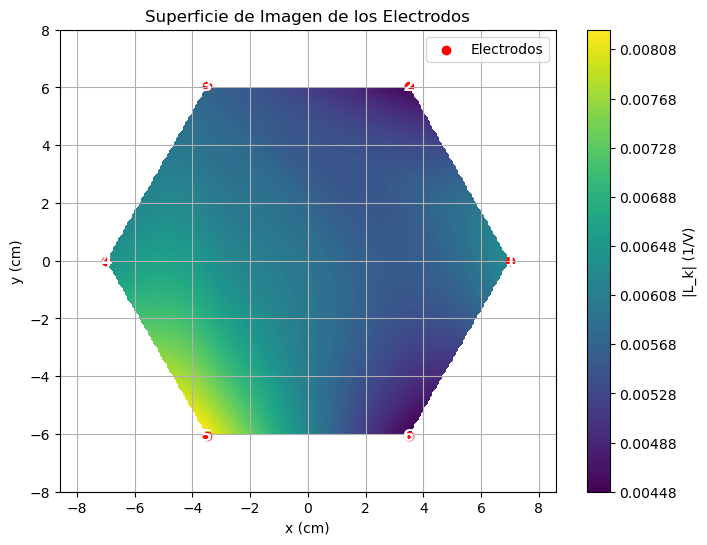

In [11]:
# Reimportar librerías y rehacer cálculos tras el reinicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Datos de potenciales medidos (en milivoltios)
electrodes = [1, 2, 3, 4, 5, 6]
Vx_mV = np.array([3, 1, -2, -3, -1, 2])
Vy_mV = np.array([1, 2, 2, -1, -4, -1])

# Dipolo aplicado (en mA·m)
P_mAm = 500

# Cálculo de los vectores de derivación unipolares (en 1/V)
Lx = Vx_mV / P_mAm
Ly = Vy_mV / P_mAm

# Paso 1: Posiciones angulares y cartesianas de los electrodos
num_electrodes = 6
theta = np.linspace(0, 2 * np.pi, num_electrodes, endpoint=False)
radius = 7  # cm

# Coordenadas (x, y) de cada electrodo
x_coords = radius * np.cos(theta)
y_coords = radius * np.sin(theta)

# Paso 2: Magnitud de cada vector derivación
magnitudes = np.sqrt(Lx**2 + Ly**2)

# Paso 3: Interpolación sobre una malla 2D
grid_x, grid_y = np.mgrid[-8:8:200j, -8:8:200j]
points = np.vstack((x_coords, y_coords)).T
values = magnitudes
grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')

# Paso 4: Graficar superficie de imagen
plt.figure(figsize=(8, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
plt.colorbar(contour, label='|L_k| (1/V)')
plt.scatter(x_coords, y_coords, c='red', label='Electrodos')
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    plt.text(x, y, str(i+1), color='white', fontsize=12, ha='center', va='center', weight='bold')
plt.title("Superficie de Imagen de los Electrodos")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


el grafico representa como la configuracion espacial influye en la senseibilidad del sistema ante un dipolo en el centro. descripcion del grafico:

- Los colores indican la magnitud del vector de derivación $|\vec{L}_k|$ en cada punto del plano.
- Los puntos rojos son las posiciones reales de los electrodos sobre el brazalete (círculo de 14 cm de diámetro).
- Los números sobre los puntos indican el número de cada electrodo.
- La escala de color indica en qué zonas la sensibilidad del sistema de electrodos es mayor o menor.

c)   **Diseñe  un  sistema  de  derivaciones  ortonormal  para  medir  la  componente  𝑿  del  dipolo  eléctrico  con  la  mayor 
sensibilidad posible.**
---

Sabemos que:

$$
V_k = \vec{L}_k \cdot \vec{P} = L_{kx} P_x + L_{ky} P_y
$$

Si queremos aislar la componente en $X$, buscamos una combinación de señales $V_k$ tal que:

$$
V_X = \sum_{k=1}^{6} w_k V_k \quad \text{con} \quad V_k = L_{kx} P_x + L_{ky} P_y
$$

Entonces:

$$
V_X = \left( \sum_{k=1}^{6} w_k L_{kx} \right) P_x + \left( \sum_{k=1}^{6} w_k L_{ky} \right) P_y
$$

Para medir solo $P_x$, necesitamos que:

$$
\sum_{k=1}^{6} w_k L_{ky} = 0 \quad \text{(ortogonal a Y)}
$$

y que:

$$
\sum_{k=1}^{6} w_k L_{kx} \quad \text{sea máximo (mayor sensibilidad).}
$$


In [12]:
# Vector de derivación para cada componente
Lx_vec = Lx.reshape(-1, 1)  # columna de 6x1
Ly_vec = Ly.reshape(-1, 1)  # columna de 6x1

# Proyectamos Lx sobre el subespacio ortogonal a Ly
# Fórmula: Lx_proj = Lx - Proy_Ly(Lx)
# Proy_Ly(Lx) = (Lx^T Ly) / (Ly^T Ly) * Ly
numerador = np.dot(Lx_vec.T, Ly_vec)  # escalar
denominador = np.dot(Ly_vec.T, Ly_vec)  # escalar
proyeccion = (numerador / denominador) * Ly_vec
Lx_ortogonal = Lx_vec - proyeccion  # componente de Lx ortogonal a Ly

# Normalizamos para obtener un sistema ortonormal
norma = np.linalg.norm(Lx_ortogonal)
w_opt = Lx_ortogonal / norma

# Mostramos los pesos óptimos
df_pesos_x = pd.DataFrame({
    "Electrodo": electrodes,
    "Peso óptimo w_k (X)": w_opt.flatten()
})

df_pesos_x


,Electrodo,Peso óptimo w_k (X)
0,1,0.537914
1,2,0.107583
2,3,-0.473365
3,4,-0.537914
4,5,-0.021517
5,6,0.430331


Estos valores indican cómo debes combinar las señales $V_k$ de cada electrodo para maximizar la sensibilidad a $P_x$ y eliminar la influencia de $P_y$.


d)   **Diseñe  un  sistema  de  derivaciones  ortonormal  para  medir  la  componente  𝒀  del  dipolo  eléctrico  con  la  mayor 
sensibilidad posible.**
---
De forma análoga al punto (c), buscamos:

$$
V_Y = \sum w_k V_k \quad \text{tal que} \quad \sum w_k L_{kx} = 0 \quad \text{y} \quad \|w\| = 1
$$

La solución es proyectar $\vec{L}_y$ sobre el subespacio ortogonal a $\vec{L}_x$:

$$
\vec{L}_y^\perp = \vec{L}_y - \mathrm{proj}_{\vec{L}_x}(\vec{L}_y)
$$

Y luego normalizar.


In [13]:
# Proyectamos Ly sobre el subespacio ortogonal a Lx
# Fórmula: Ly_proj = Ly - Proy_Lx(Ly)
numerador_y = np.dot(Ly_vec.T, Lx_vec)
denominador_y = np.dot(Lx_vec.T, Lx_vec)
proyeccion_y = (numerador_y / denominador_y) * Lx_vec
Ly_ortogonal = Ly_vec - proyeccion_y  # componente de Ly ortogonal a Lx

# Normalizamos para obtener un sistema ortonormal
norma_y = np.linalg.norm(Ly_ortogonal)
w_opt_y = Ly_ortogonal / norma_y

# Mostramos los pesos óptimos
df_pesos_y = pd.DataFrame({
    "Electrodo": electrodes,
    "Peso óptimo w_k (Y)": w_opt_y.flatten()
})

df_pesos_y


,Electrodo,Peso óptimo w_k (Y)
0,1,0.070430
1,2,0.352148
2,3,0.478921
3,4,-0.070430
4,5,-0.746553
5,6,-0.281718


Esta combinación elimina la influencia de $P_x$ y maximiza la sensibilidad a $P_y$, manteniendo ortonormalidad.

e)   **Presente el diseño del sistema de derivación sobre el brazalete de electrodos.**
---

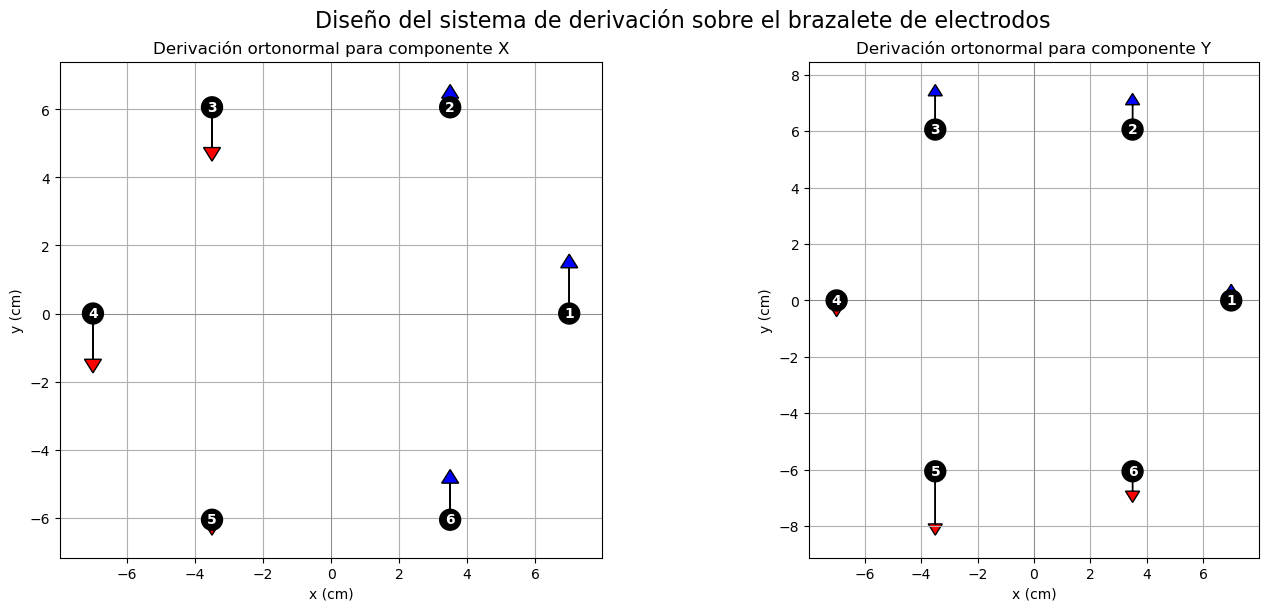

In [14]:
# Crear figura con dos subplots: una para cada derivación
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Datos comunes
labels = [str(i) for i in electrodes]

# --- DERIVACIÓN X ---
axs[0].scatter(x_coords, y_coords, c='black')
axs[0].axhline(0, color='gray', lw=0.5)
axs[0].axvline(0, color='gray', lw=0.5)
axs[0].set_title("Derivación ortonormal para componente X")
axs[0].set_aspect('equal')
axs[0].set_xlabel("x (cm)")
axs[0].set_ylabel("y (cm)")
axs[0].grid(True)

# Flechas para los pesos en X
for i in range(num_electrodes):
    weight = w_opt[i, 0]
    axs[0].arrow(x_coords[i], y_coords[i], 0, weight * 2.5, 
                 head_width=0.5, head_length=0.4, fc='blue' if weight > 0 else 'red', ec='black')
    axs[0].text(x_coords[i], y_coords[i], labels[i], color='white', ha='center', va='center', weight='bold',
                bbox=dict(facecolor='black', edgecolor='none', boxstyle='circle,pad=0.3'))

# --- DERIVACIÓN Y ---
axs[1].scatter(x_coords, y_coords, c='black')
axs[1].axhline(0, color='gray', lw=0.5)
axs[1].axvline(0, color='gray', lw=0.5)
axs[1].set_title("Derivación ortonormal para componente Y")
axs[1].set_aspect('equal')
axs[1].set_xlabel("x (cm)")
axs[1].set_ylabel("y (cm)")
axs[1].grid(True)

# Flechas para los pesos en Y
for i in range(num_electrodes):
    weight = w_opt_y[i, 0]
    axs[1].arrow(x_coords[i], y_coords[i], 0, weight * 2.5, 
                 head_width=0.5, head_length=0.4, fc='blue' if weight > 0 else 'red', ec='black')
    axs[1].text(x_coords[i], y_coords[i], labels[i], color='white', ha='center', va='center', weight='bold',
                bbox=dict(facecolor='black', edgecolor='none', boxstyle='circle,pad=0.3'))

plt.suptitle("Diseño del sistema de derivación sobre el brazalete de electrodos", fontsize=16)
plt.show()


### Panel izquierdo: Derivación para componente X

- Las flechas azules apuntan hacia arriba (pesos positivos), y las rojas hacia abajo (pesos negativos).
- Muestra cómo combinar los 6 electrodos para maximizar la sensibilidad a $P_x$.

### Panel derecho: Derivación para componente Y

- Mismo criterio gráfico, ahora ajustado para responder únicamente a $P_y$.
- Algunos pesos son más extremos (como en el Electrodo 5), lo que muestra su mayor influencia.

Este tipo de representación es clave en neuroingeniería y biopotenciales, pues permite ver cuáles electrodos aportan más a cada componente y en qué dirección.


f)   **Realice un diseño de acondicionamiento básico con amplificadores operacionales de tal manera que pueda capturar 
los voltajes producidos por las derivaciones en un rango entre -2.5V y 2.5V.**
---

![diseño con amplificadores operaciones.png](<attachment:diseño con amplificadores operaciones.png>)
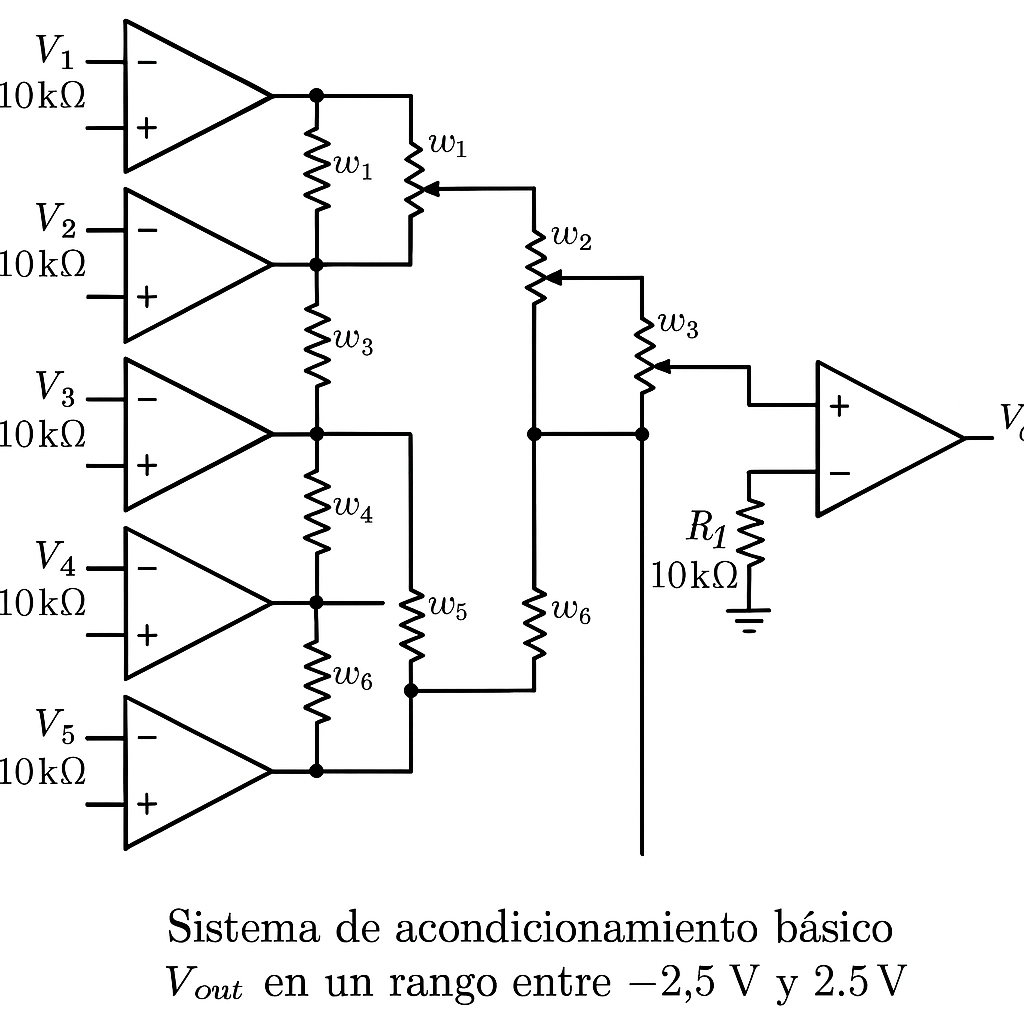

**Descripcion de los componentes del circuito**

### Entradas $V_1, V_2, \dots, V_6$

- Representan las señales de los 6 electrodos, ya combinadas con sus respectivos pesos $w_k$ de las derivaciones (X o Y).
- Cada una entra primero en una etapa de aislamiento y amplificación individual (amplificador operacional no inversor).
- Las resistencias de entrada (10 k$\Omega$) garantizan que las señales no se vean afectadas por impedancias cruzadas.

### Resistencias $w_1, w_2, ..., w_6$
- Son resistencias ajustables que implementan los pesos $w_k$ que obtuvimos anteriormente (positivos o negativos).

- Lo que hace cada una es escalar la señal de su electrodo en proporción al valor que queremos asignar en la derivación.

### Nodo de suma (intermedio)

- Aquí se suman todas las corrientes que pasan por las resistencias $w_k$.
- Es el equivalente analógico de la suma ponderada que define la derivación.

$$
I_{\text{total}} = \sum_{k=1}^{6} \frac{V_k}{w_k}
$$

### Amplificador operacional final (sumador/inversor)

- Toma la señal combinada (suma de corrientes) y la convierte en un voltaje de salida.
- La resistencia de retroalimentación $R_1 = 10\ \text{k}\Omega$ ajusta la ganancia total del circuito.

$$
V_{\text{out}} = -R_1 \cdot I_{\text{total}} = -R_1 \cdot \sum_{k=1}^{6} \frac{V_k}{w_k}
$$

- El signo negativo indica que es un sumador inversor, por eso si quieres invertir el resultado, puedes usar una etapa de inversión posterior si es necesario.




g)   **Diseñe un circuito de acondicionamiento que le permita adquirir los voltajes por el Conversor Analógico a Digital 
(ADC) de un Arduino que funciona entre 0V y 5V.**
---

### Solución: Biásar la señal (desplazamiento DC)**

La idea es sumar un voltaje DC de $+2.5\ \text{V}$ a la salida para mover el rango completo:

$$
[-2.5\ \text{V},\ +2.5\ \text{V}] \quad \Rightarrow \quad [0\ \text{V},\ 5\ \text{V}]
$$

offset de nivel de referencia (_level shifting_).


### Circuito propuesto: Sumador no inversor con offset

1. Se toma la salida del circuito anterior: $V_{\text{bio}} \in [-2.5\ \text{V},\ +2.5\ \text{V}]$

2. Se pasa por un amplificador sumador con entrada offset:

$$
V_{\text{out}} = V_{\text{bio}} + V_{\text{ref}}
$$

Donde $V_{\text{ref}} = +2.5\ \text{V}$ (producido por un divisor resistivo o un regulador de referencia).

![diseño con arduino.png](<attachment:diseño con arduino.png>)
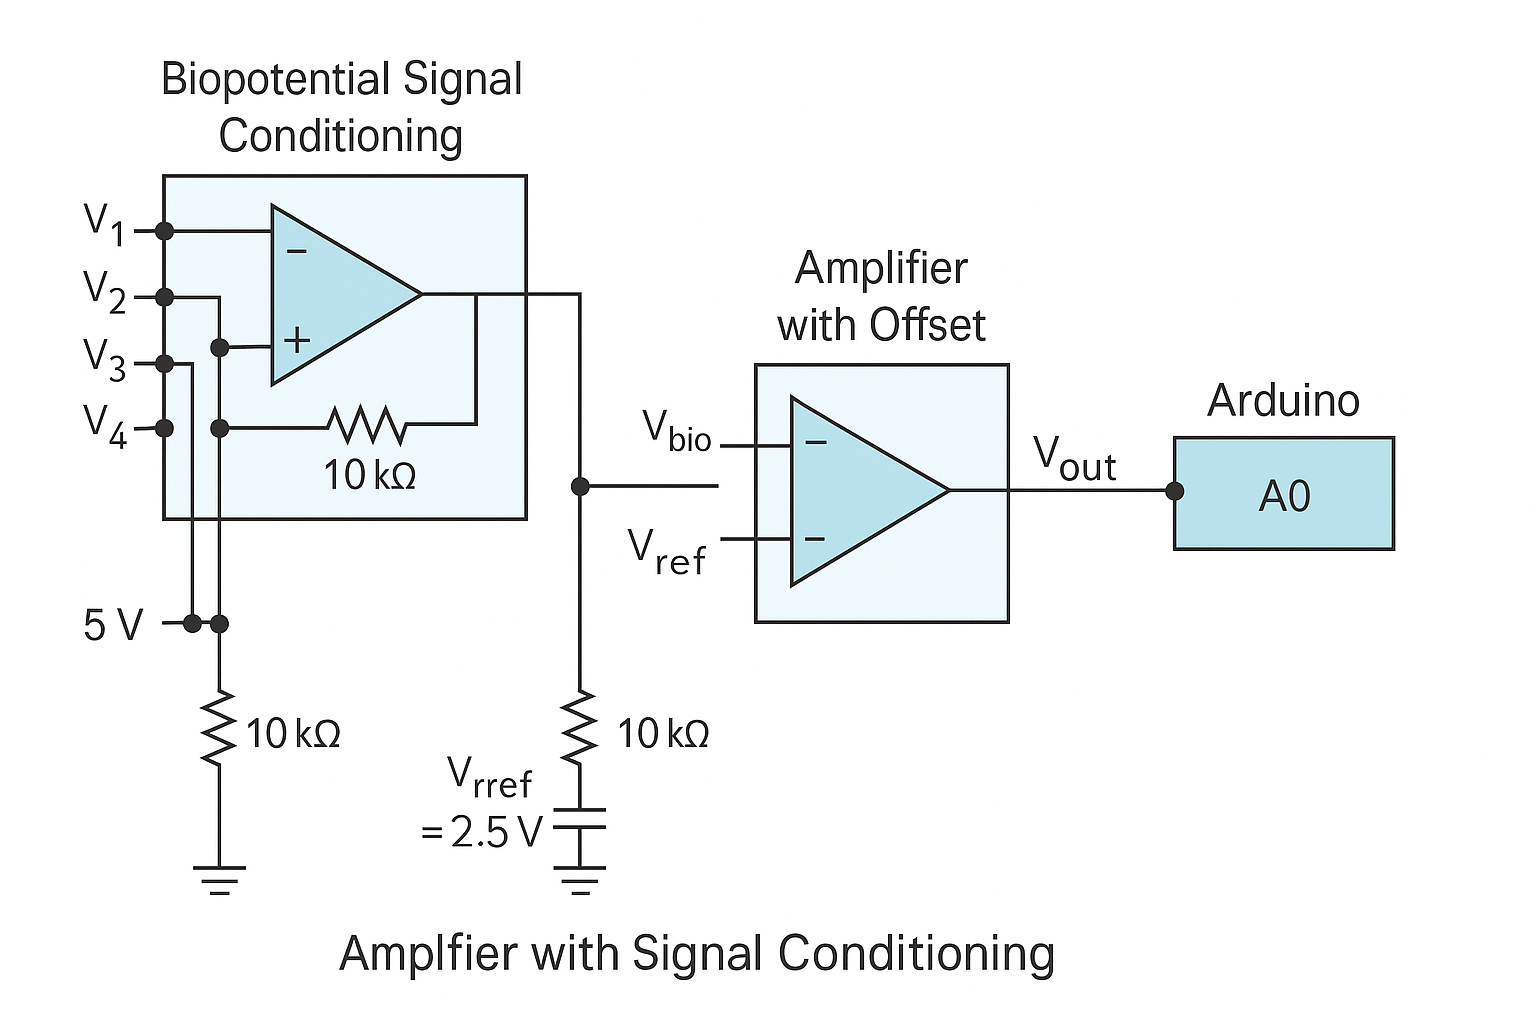

h)   **Presente un código simple que le permita adquirir y graficar las señales de ambas derivaciones con una frecuencia 
de muestreo de 125 Hz.**
---

In [15]:
// Código Arduino para adquirir señales a 125 Hz desde A0 y A1
const int canalX = A0;  // derivación en X
const int canalY = A1;  // derivación en Y
const unsigned long T_muestreo = 8;  // ms (125 Hz)

void setup() {
  Serial.begin(115200);
}

void loop() {
  static unsigned long t_anterior = 0;
  unsigned long t_actual = millis();
  
  if (t_actual - t_anterior >= T_muestreo) {
    int lecturaX = analogRead(canalX);  // 0 a 1023
    int lecturaY = analogRead(canalY);
    
    // Enviar como CSV (se puede graficar fácilmente)
    Serial.print(lecturaX);
    Serial.print(",");
    Serial.println(lecturaY);

    t_anterior = t_actual;
  }
}


SyntaxError: invalid syntax (1908933336.py, line 1)